In [24]:
import os
import numpy as np
import pickle
import json
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sympy.physics.control.control_plots import matplotlib
from tqdm import tqdm
import seaborn as sns
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')
font = {'family': 'Arial'}

matplotlib.rcParams['mathtext.fontset'] = 'custom'

matplotlib.rcParams['mathtext.rm'] = 'Arial'

matplotlib.rcParams['mathtext.it'] = 'Arial'

matplotlib.rc('font', **font)
matplotlib.rcParams['pdf.fonttype'] = 42  # make the text editable for Adobe Illustrator
matplotlib.rcParams['ps.fonttype'] = 42


# matplotlib.rc('font', **font0)
def set_ax_linewidth(ax, bw=1.5):
    ax.spines['bottom'].set_linewidth(bw)
    ax.spines['left'].set_linewidth(bw)
    ax.spines['top'].set_linewidth(bw)
    ax.spines['right'].set_linewidth(bw)


def set_ax_font_size(ax, fontsize=11.7):
    ax.tick_params(axis='y',
                   labelsize=fontsize  # y轴字体大小设置
                   )
    ax.tick_params(axis='x',
                   labelsize=fontsize  # x轴字体大小设置
                   )

In [25]:
data_path = '/data/trf/python_works/BatteryLife/dataset/MATR'
MATR_labels = json.load(open('/data/trf/python_works/BatteryLife/dataset/Life labels/MATR_labels.json'))
print(MATR_labels)
files = os.listdir(data_path)
files = [i for i in files if 'pkl' in i]

{'MATR_b4c36.pkl': 599, 'MATR_b2c46.pkl': 428, 'MATR_b2c21.pkl': 488, 'MATR_b1c27.pkl': 841, 'MATR_b2c41.pkl': 428, 'MATR_b4c37.pkl': 863, 'MATR_b3c3.pkl': 1113, 'MATR_b3c39.pkl': 1154, 'MATR_b1c21.pkl': 557, 'MATR_b2c44.pkl': 455, 'MATR_b3c24.pkl': 823, 'MATR_b2c30.pkl': 480, 'MATR_b2c27.pkl': 467, 'MATR_b4c0.pkl': 856, 'MATR_b3c27.pkl': 847, 'MATR_b4c19.pkl': 991, 'MATR_b3c30.pkl': 933, 'MATR_b2c43.pkl': 461, 'MATR_b3c34.pkl': 1156, 'MATR_b1c37.pkl': 648, 'MATR_b2c39.pkl': 458, 'MATR_b4c43.pkl': 750, 'MATR_b1c28.pkl': 858, 'MATR_b1c38.pkl': 614, 'MATR_b2c34.pkl': 498, 'MATR_b1c20.pkl': 533, 'MATR_b3c15.pkl': 874, 'MATR_b2c26.pkl': 470, 'MATR_b4c11.pkl': 863, 'MATR_b1c33.pkl': 754, 'MATR_b4c29.pkl': 887, 'MATR_b2c38.pkl': 464, 'MATR_b4c12.pkl': 818, 'MATR_b3c28.pkl': 539, 'MATR_b4c23.pkl': 1038, 'MATR_b1c7.pkl': 869, 'MATR_b2c6.pkl': 510, 'MATR_b4c33.pkl': 505, 'MATR_b4c28.pkl': 828, 'MATR_b3c0.pkl': 1007, 'MATR_b4c21.pkl': 773, 'MATR_b2c23.pkl': 526, 'MATR_b4c18.pkl': 906, 'MATR_b1c5

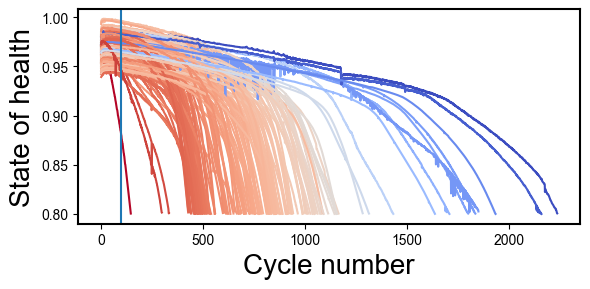

In [27]:
cycle_min = min(list(MATR_labels.values()))
cycle_max = max(list(MATR_labels.values()))
norm = matplotlib.colors.Normalize(vmin=cycle_min, vmax=cycle_max)
colormap = sns.color_palette("coolwarm_r", as_cmap=True)

fig = plt.figure(figsize=(6, 3))
for file in files:
    label = MATR_labels[file]
    color = colormap(norm(label))
    data = pickle.load(open(f'{data_path}/{file}', 'rb'))
    cycle_data = data['cycle_data']
    total_SOHs = []
    total_cycles = []
    for one_cycle_data in cycle_data:
        SOH = max(one_cycle_data['discharge_capacity_in_Ah']) / 1.1
        if SOH < 0.8:
            continue
        if len(total_SOHs) >= 1 and abs(SOH-total_SOHs[-1]) > 0.05:
            continue
        total_cycles.append(one_cycle_data['cycle_number'])
        total_SOHs.append(SOH)
    
    plt.plot(total_cycles, total_SOHs, c=color)
set_ax_linewidth(plt.gca())
plt.xlabel('Cycle number', fontsize='20')
plt.ylabel('State of health', fontsize='20')
plt.axvline(100)
fig.tight_layout()
plt.savefig('../figures/MATR_SOH_trajectories.jpg', dpi=600)
plt.show()